In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv("6.3.3_spotify_5000_songs.csv",sep=',')
df.head()

,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,id,html
0,Se Eu Quiser Falar Com Deus ...,Gilberto Gil,0.658,0.2590,11,-13.141,0,0.0705,0.694,0.000059,0.975,0.306,110.376,256213,4,1n7JnwviZ7zf0LR1tcGFq7,https://open.spotify.com/track/1n7JnwviZ7zf0LR...
1,Saudade De Bahia ...,Antônio Carlos Jobim,0.742,0.3990,2,-12.646,1,0.0346,0.217,0.000002,0.107,0.693,125.039,191867,4,5QGM1U0eCYrQuwSJwTm5Zq,https://open.spotify.com/track/5QGM1U0eCYrQuwS...
2,"Canta Canta, Minha Gente ...",Martinho Da Vila,0.851,0.7300,2,-11.048,1,0.3470,0.453,0.000063,0.124,0.905,93.698,152267,4,0NLIFSZxPzQhCwnkn5PJYs,https://open.spotify.com/track/0NLIFSZxPzQhCwn...
3,Mulher Eu Sei ...,Chico César,0.705,0.0502,4,-18.115,1,0.0471,0.879,0.000041,0.386,0.524,106.802,186227,4,3mXqOdlLE1k67WsAxryPFs,https://open.spotify.com/track/3mXqOdlLE1k67Ws...
4,Rosa Morena ...,Kurt Elling,0.651,0.1190,6,-19.807,1,0.0380,0.916,0.000343,0.104,0.402,120.941,273680,4,7bSzjzjTkWT2CkIPPdp0eA,https://open.spotify.com/track/7bSzjzjTkWT2CkI...


In [3]:
print(df.columns)

Index(['name                                                                                                                                                                             ',
       'artist                                          ', 'danceability ',
       'energy   ', 'key ', 'loudness ', 'mode ', 'speechiness ',
       'acousticness ', 'instrumentalness ', 'liveness ', 'valence ',
       'tempo   ', 'duration_ms ', 'time_signature ',
       'id                     ', 'html'],
      dtype='object')


In [4]:
df.columns = df.columns.str.strip()
print(df.columns)

Index(['name', 'artist', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature', 'id', 'html'],
      dtype='object')


In [5]:
# Selecting some numeric features for clustering
features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

X = df[features]

In [6]:
# Scaling the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## PCA Analysis of selected features

In [7]:
# Selected features (reminder):
# features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df['pca1'] = X_pca[:, 0]
df['pca2'] = X_pca[:, 1]

In [8]:
# Perform PCA
pca = PCA(n_components=2)
pca_features = pca.fit_transform(X_scaled)

# Principal components correlation coefficients (loadings)
loadings = pca.components_

# Match PC names to loadings
pc_list = [f'PC{i}' for i in range(1, pca.n_components_ + 1)]
loadings_df = pd.DataFrame(loadings.T, columns=pc_list, index = features)

# Display the loadings DataFrame
print(loadings_df)

                       PC1       PC2
danceability      0.293296  0.529215
energy            0.445747 -0.365174
loudness          0.501267 -0.097988
speechiness       0.187241 -0.233883
acousticness     -0.432105  0.327729
instrumentalness -0.337189 -0.389863
liveness          0.099077 -0.146596
valence           0.306236  0.474463
tempo             0.157957 -0.127558


In [9]:
import matplotlib.pyplot as plt 
import seaborn as sns

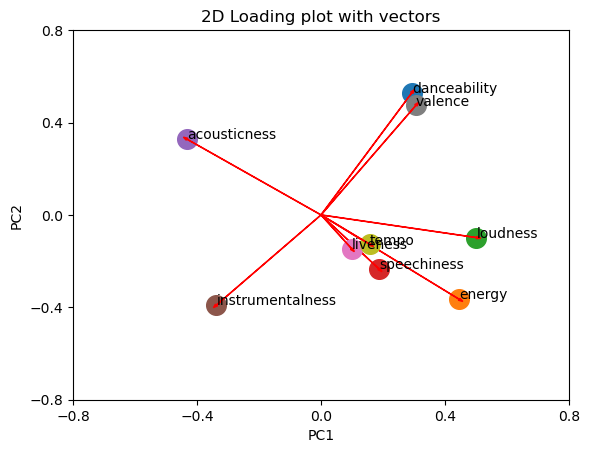

In [10]:
# Get the loadings of x and y axes
xs = loadings[0]
ys = loadings[1]

# Plot the loadings on a scatterplot
for i, varnames in enumerate(features):
    plt.scatter(xs[i], ys[i], s=200)
    plt.arrow(
        0, 0, # coordinates of arrow base
        xs[i], # length of the arrow along x
        ys[i], # length of the arrow along y
        color='r', 
        head_width=0.01
        )
    plt.text(xs[i], ys[i], varnames)

# Define the axes
xticks = np.linspace(-0.8, 0.8, num=5)
yticks = np.linspace(-0.8, 0.8, num=5)
plt.xticks(xticks)
plt.yticks(yticks)
plt.xlabel('PC1')
plt.ylabel('PC2')

# Show plot
plt.title('2D Loading plot with vectors')
plt.show()

## Determining # of Clusters

#### Elbow Method

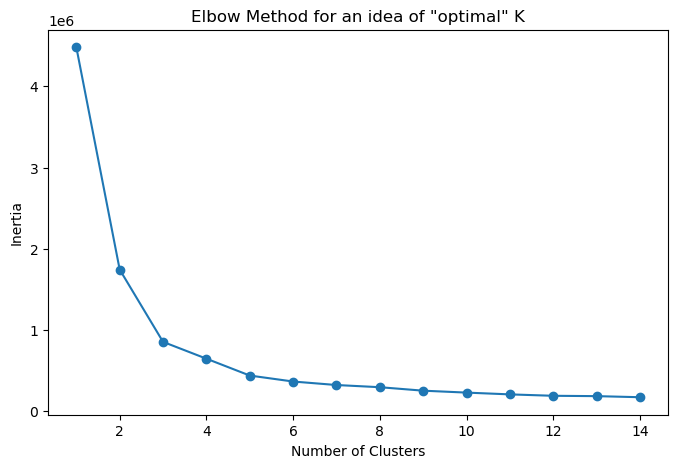

In [11]:
# Elbow Method
sse = []
range_n_clusters = range(1, 15)
for k in range_n_clusters:
    kmeans = KMeans(n_clusters = k, random_state= 420)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range_n_clusters, sse, marker='o')
plt.title('Elbow Method for an idea of "optimal" K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()
# --> prob. sth. between three (3) and five (5) clusters?

#### Silhouette Method

In [12]:
# Silhouette method
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

For n_clusters = 2, the average silhouette_score is : 0.33
For n_clusters = 3, the average silhouette_score is : 0.27
For n_clusters = 4, the average silhouette_score is : 0.28
For n_clusters = 5, the average silhouette_score is : 0.27
For n_clusters = 6, the average silhouette_score is : 0.25
For n_clusters = 7, the average silhouette_score is : 0.22
For n_clusters = 8, the average silhouette_score is : 0.21
For n_clusters = 9, the average silhouette_score is : 0.20
For n_clusters = 10, the average silhouette_score is : 0.19
For n_clusters = 11, the average silhouette_score is : 0.19


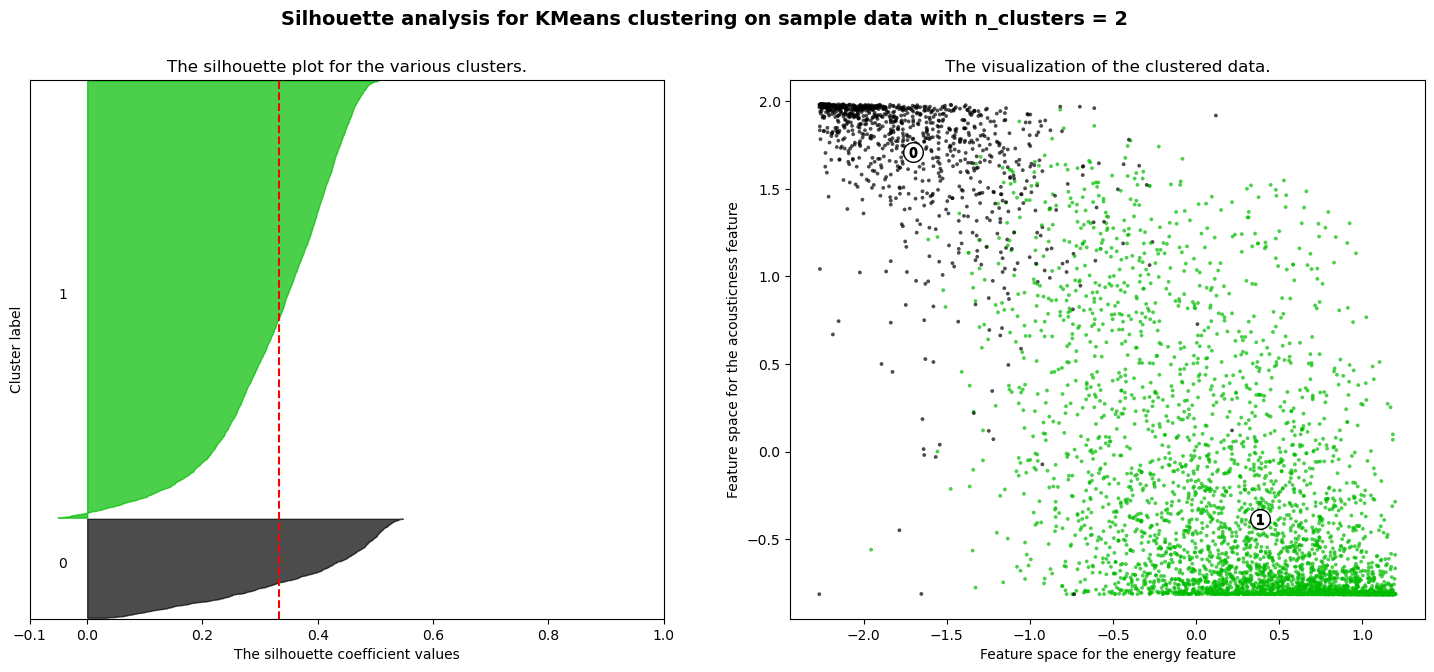

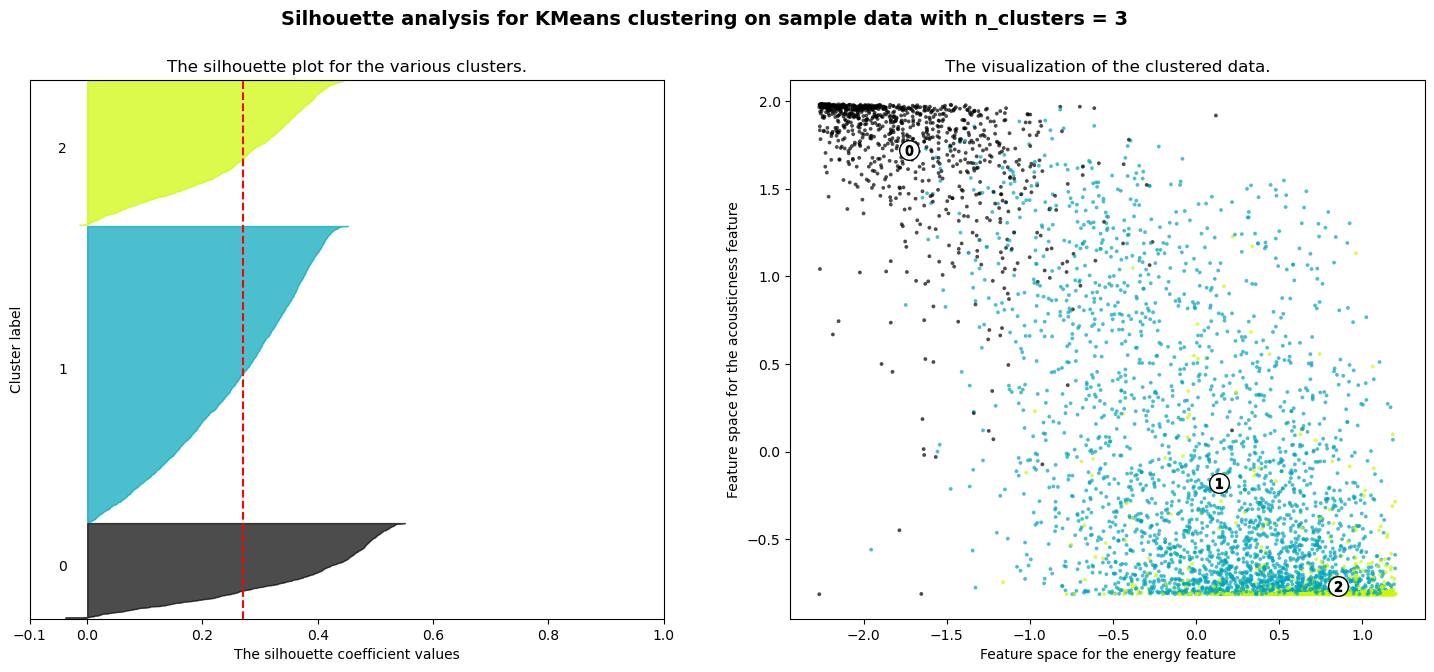

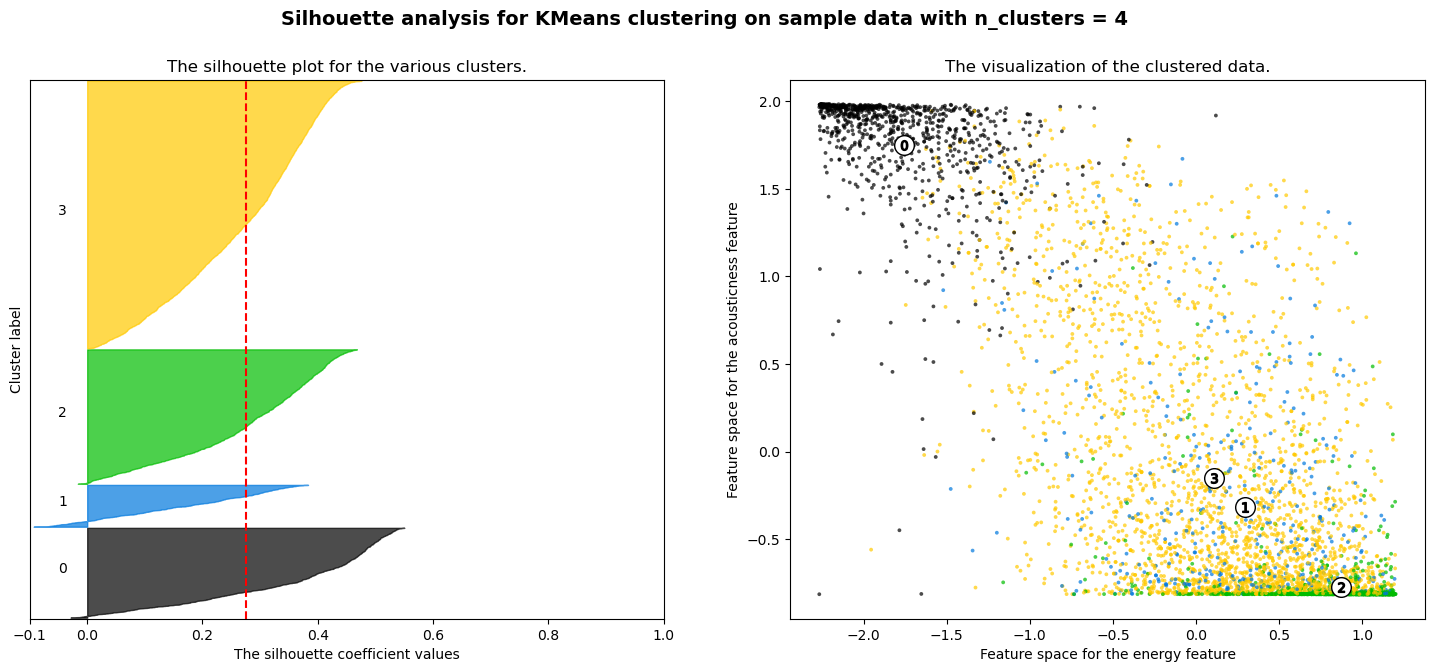

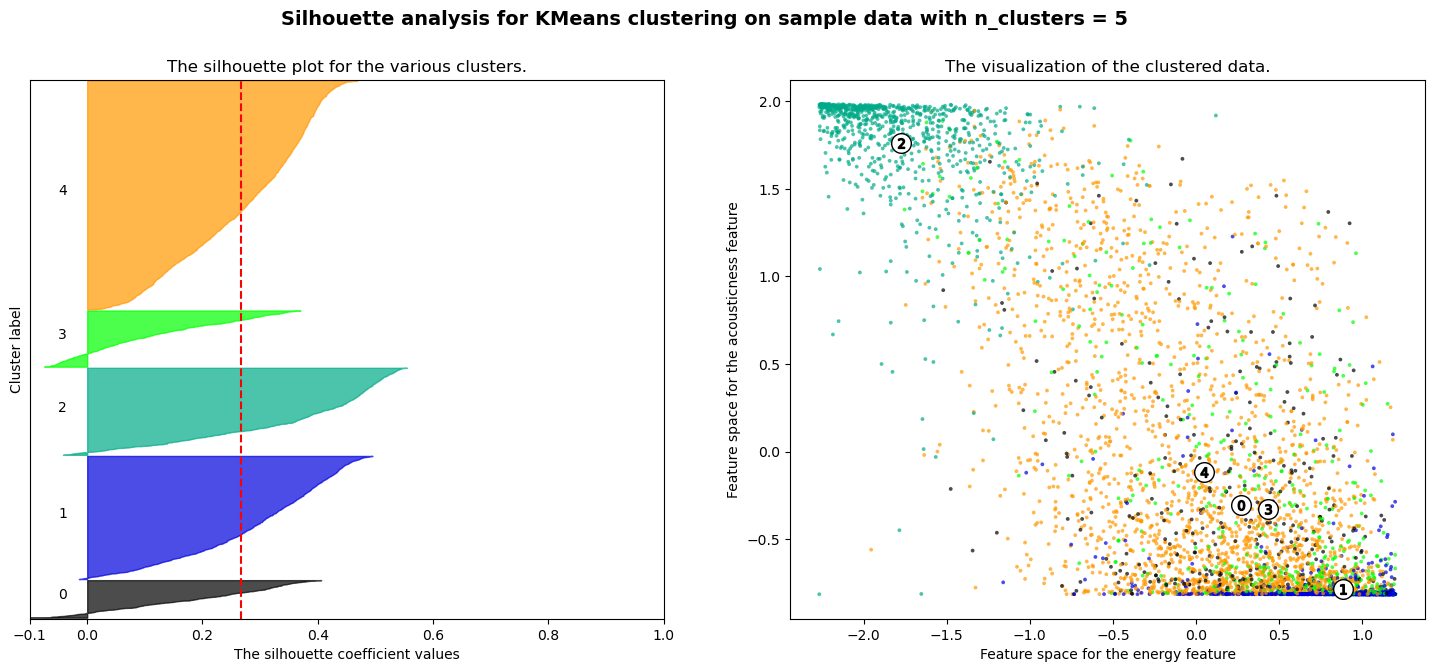

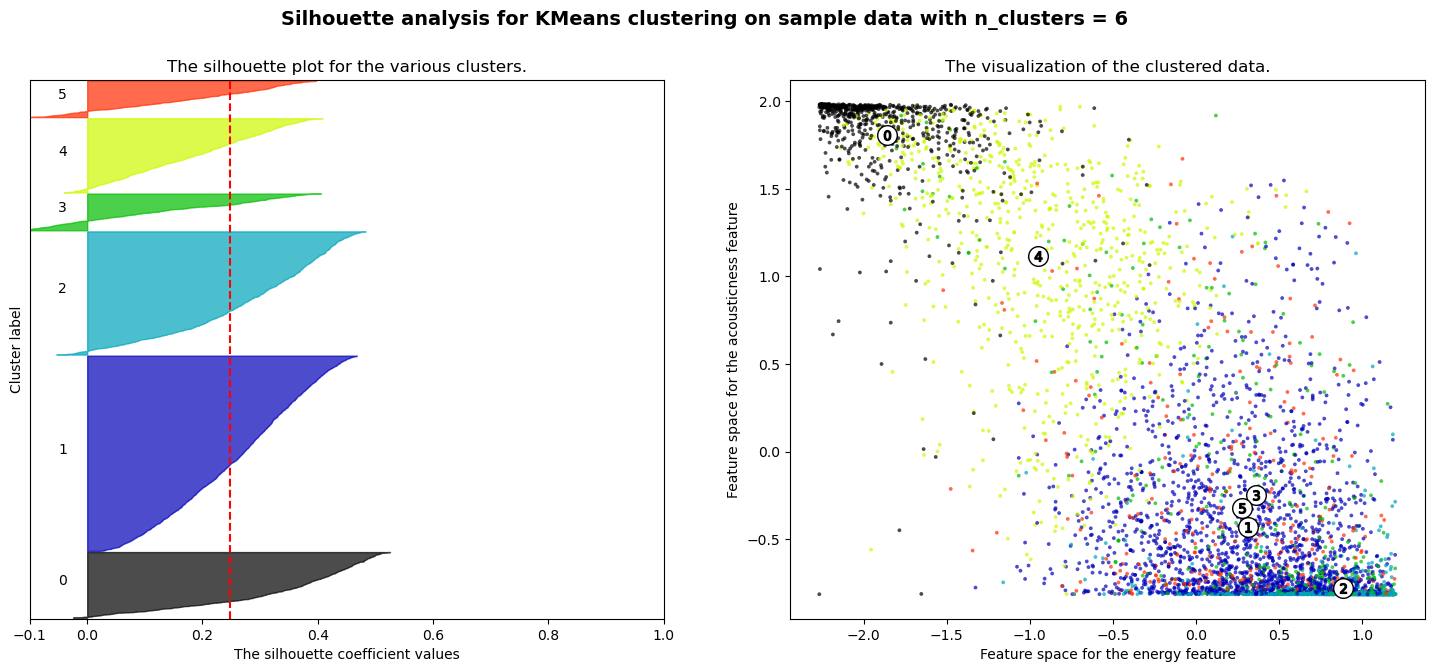

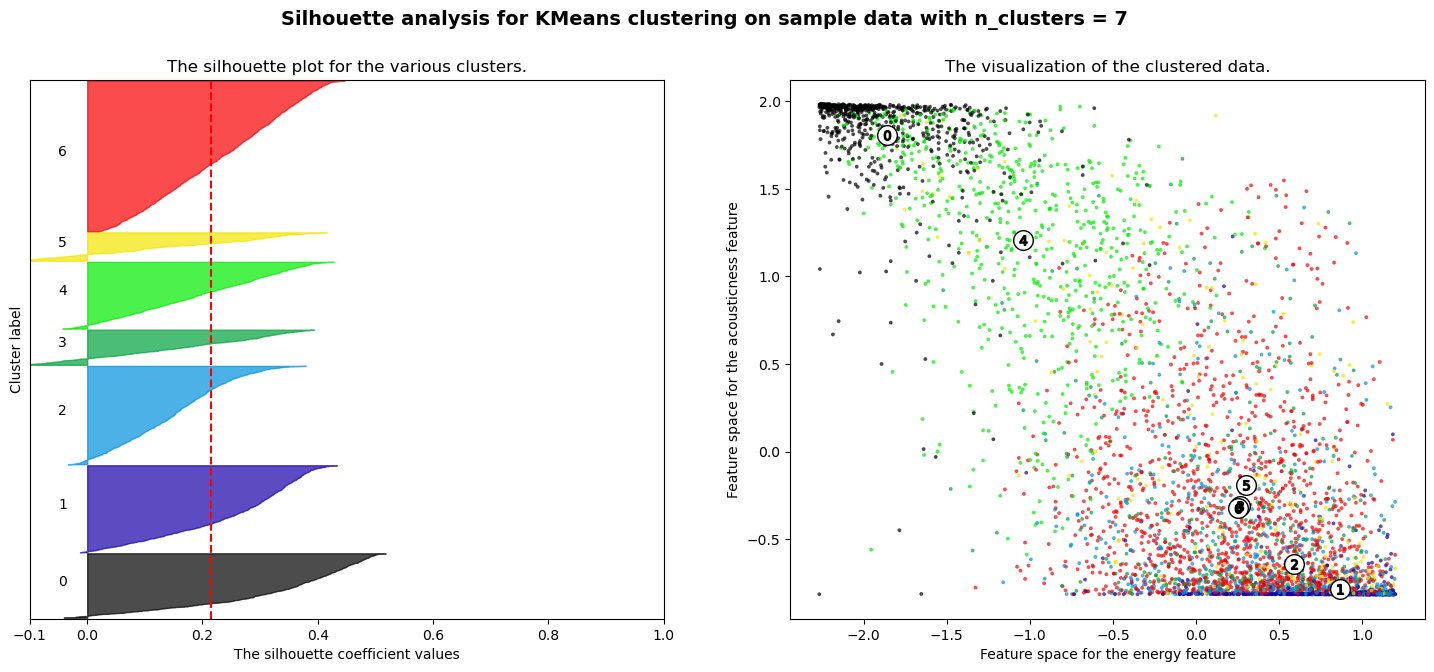

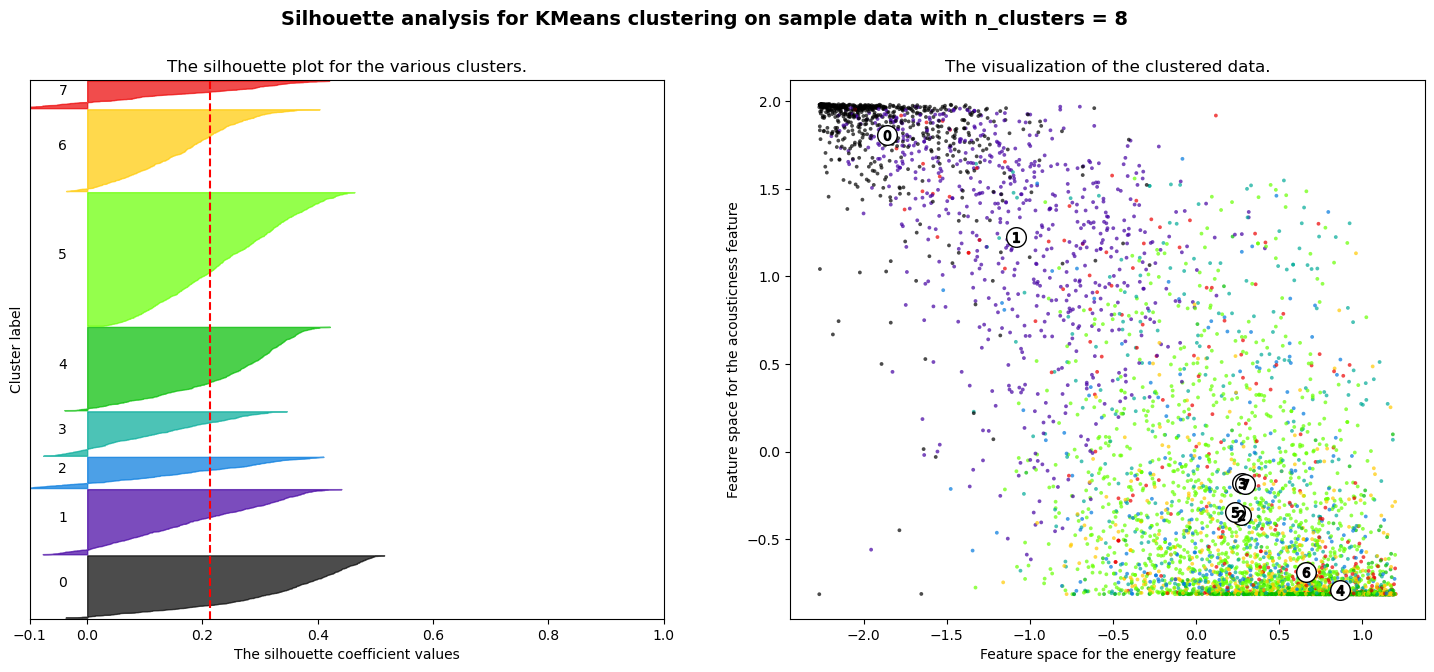

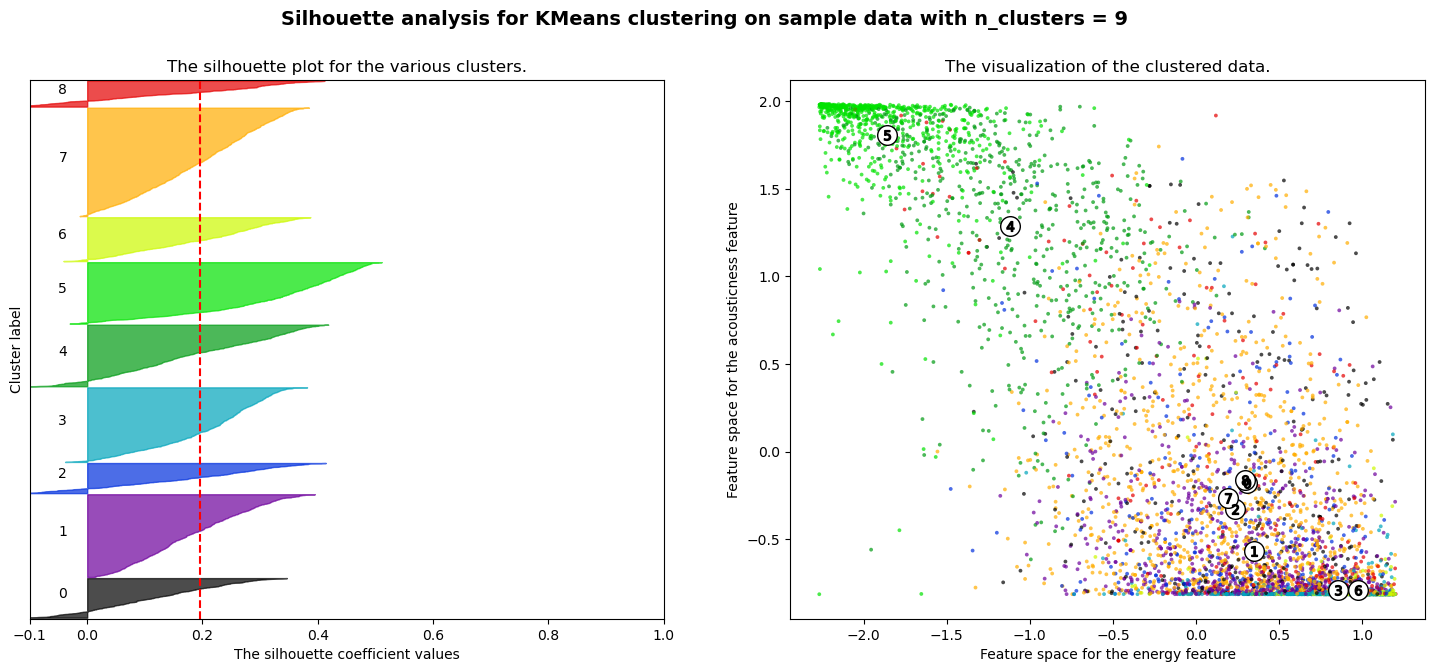

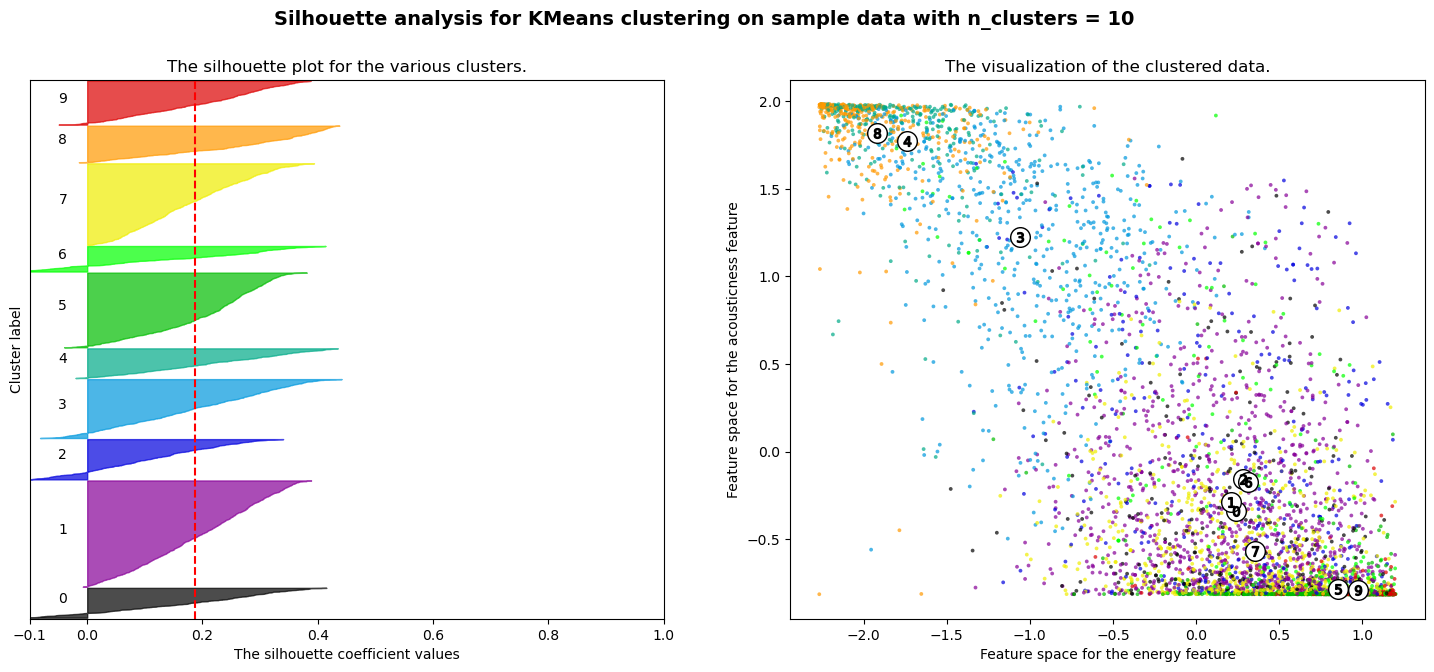

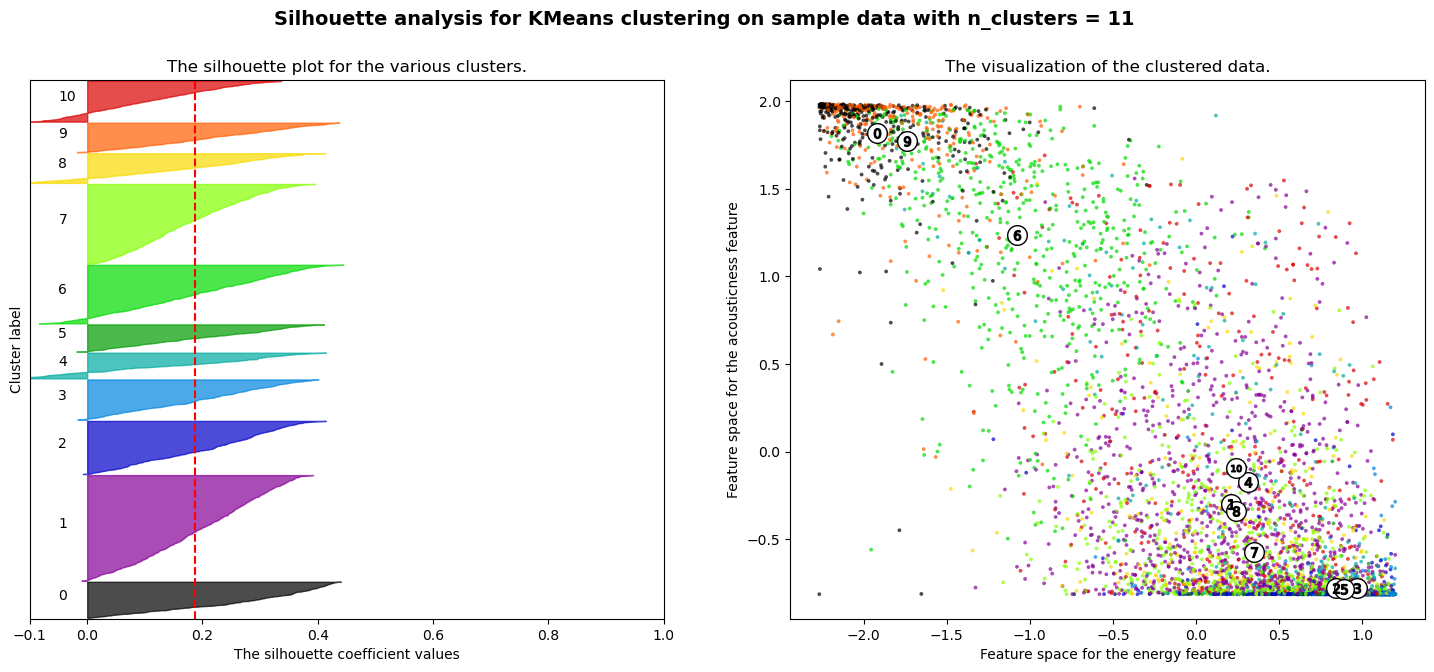

In [13]:
# Selected features (reminder):
# features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

# Select features for scatter plot
x_feature_idx = 1  # energy
y_feature_idx = 4  # acousticness
# energy & acousticness were selected based on PCA 

for k in range(2, 12):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # Initialize and fit KMeans
    kmeans = KMeans(init="random", n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)

    # Compute silhouette score
    silhouette_avg = silhouette_score(X_scaled, labels)
    print(f"For n_clusters = {k}, the average silhouette_score is : {silhouette_avg:.2f}")

    sample_silhouette_values = silhouette_samples(X_scaled, labels)

    # Silhouette plot
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X_scaled) + (k + 1) * 10])

    y_lower = 10
    for i in range(k):
        ith_cluster_silhouette_values = sample_silhouette_values[labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i) / k)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10  # 10 for spacing

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # Visualization of clustered data using specific features
    colors = cm.nipy_spectral(labels.astype(float) / k)
    ax2.scatter(
        X_scaled[:, x_feature_idx], X_scaled[:, y_feature_idx], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = kmeans.cluster_centers_
    ax2.scatter(
        centers[:, x_feature_idx],
        centers[:, y_feature_idx],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[x_feature_idx], c[y_feature_idx], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel(f"Feature space for the {features[x_feature_idx]} feature")
    ax2.set_ylabel(f"Feature space for the {features[y_feature_idx]} feature")

    plt.suptitle(
        f"Silhouette analysis for KMeans clustering on sample data with n_clusters = {k}",
        fontsize=14,
        fontweight="bold",
    )

plt.show()


In [14]:
# All silhouettes are above average --> any # of groups can be justified
# Visualization of clustered data seems quiet messy though
# but this just vizualizes two features. We have nine (9) in total to consider

In [15]:
# Considering:
# For n_clusters = 2, the average silhouette_score is : 0.33
# For n_clusters = 3, the average silhouette_score is : 0.27
# For n_clusters = 4, the average silhouette_score is : 0.28
# For n_clusters = 5, the average silhouette_score is : 0.27
# For n_clusters = 6, the average silhouette_score is : 0.25
# For n_clusters = 7, the average silhouette_score is : 0.22
# For n_clusters = 8, the average silhouette_score is : 0.21
# For n_clusters = 9, the average silhouette_score is : 0.20
# For n_clusters = 10, the average silhouette_score is : 0.19

# --> n_clusters = 4, the average silhouette_score is : 0.28 good choice ?

## Hierarchical Agglomerative Clustering

In [16]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, MinMaxScaler

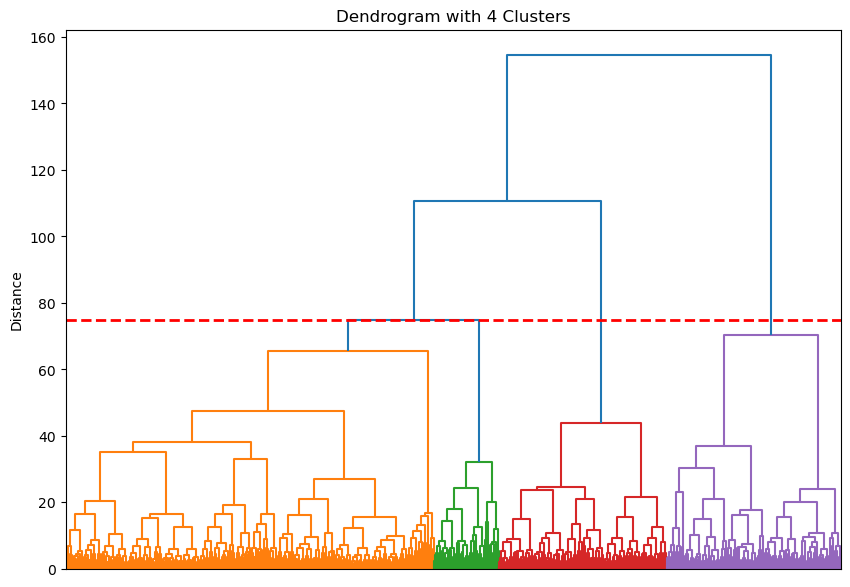

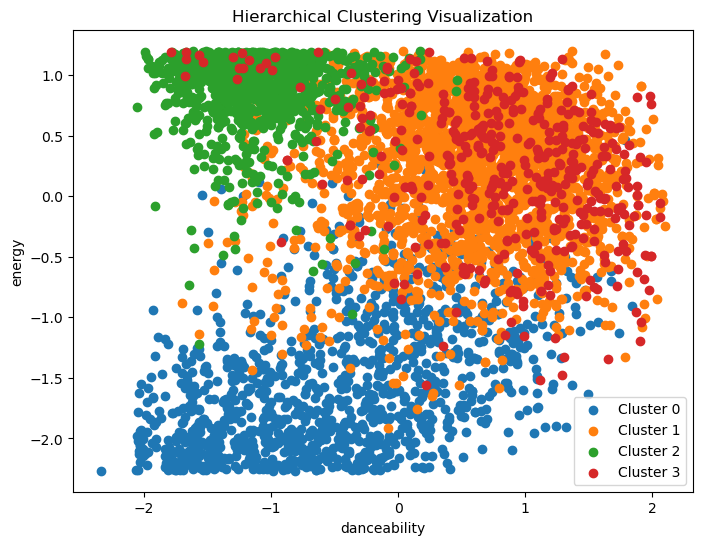

In [17]:
# Hierarchical Agglomerative Clustering using scipy
linked = linkage(X_scaled, method='ward')

# Determine the cutting height for 4 clusters
# ensuring four colours to aling with four clusters
n_clusters = 4
cutting_height = linked[-(n_clusters - 1), 2]

# Plot the dendrogram with the correct cutting height
plt.figure(figsize=(10, 7))
dendrogram(
    linked,
    orientation='top',
    distance_sort='descending',
    show_leaf_counts=True,
    color_threshold=cutting_height,
    labels=None  # No labels for leaf nodes
)
plt.axhline(y=cutting_height, c='red', lw=2, linestyle='dashed')  # Show the cut line
plt.title(f"Dendrogram with {n_clusters} Clusters")
plt.xlabel("")
plt.ylabel("Distance")
plt.xticks([])
plt.show()

# Apply Agglomerative Clustering
n_clusters = 4  # Replace with your desired number of clusters
agglomerative = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', linkage='ward')
labels = agglomerative.fit_predict(X_scaled)

# Add cluster labels to the dataset (if necessary)
df['cluster'] = labels

# Visualize the Clusters (Optional)
plt.figure(figsize=(8, 6))
for cluster in np.unique(labels):
    plt.scatter(X_scaled[labels == cluster, 0], X_scaled[labels == cluster, 1], label=f'Cluster {cluster}')

plt.title('Hierarchical Clustering Visualization')
plt.xlabel(features[0])
plt.ylabel(features[1]) 
plt.legend()
plt.show()


In [18]:
# Extract clusters
cluster_labels = fcluster(linked, t=4, criterion='maxclust') # four clusters

# Add clusters to the DataFrame
df['Cluster'] = cluster_labels

# Define a fixed color palette for clusters
cluster_colors = {0: 'blue', 1: 'orange', 2: 'green', 3: 'red'}  # colors taken from above scatter plot

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5235 entries, 0 to 5234
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              5235 non-null   object 
 1   artist            5235 non-null   object 
 2   danceability      5235 non-null   float64
 3   energy            5235 non-null   float64
 4   key               5235 non-null   int64  
 5   loudness          5235 non-null   float64
 6   mode              5235 non-null   int64  
 7   speechiness       5235 non-null   float64
 8   acousticness      5235 non-null   float64
 9   instrumentalness  5235 non-null   float64
 10  liveness          5235 non-null   float64
 11  valence           5235 non-null   float64
 12  tempo             5235 non-null   float64
 13  duration_ms       5235 non-null   int64  
 14  time_signature    5235 non-null   int64  
 15  id                5235 non-null   object 
 16  html              5235 non-null   object 


In [19]:
print(df['Cluster'].describe())

count    5235.000000
mean        2.809742
std         1.246355
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         4.000000
Name: Cluster, dtype: float64


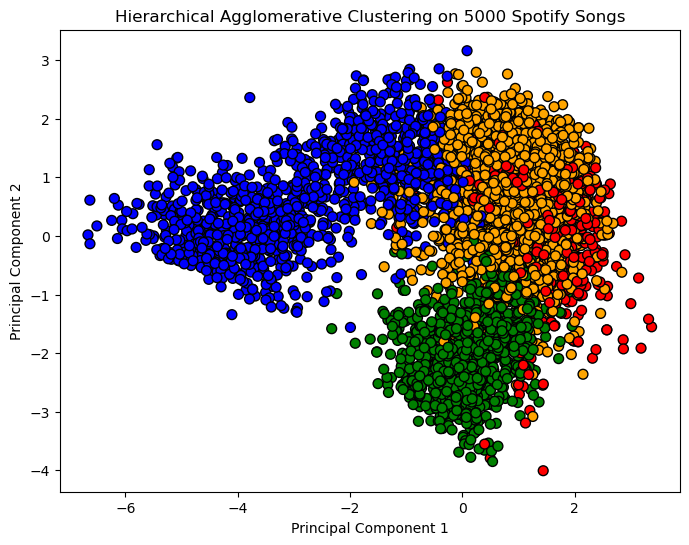

In [20]:
# Reduce dimensions for visualization
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(X_scaled)

# Map colors to cluster using df
colors = [cluster_colors[df.loc[i, 'cluster']] for i in range(len(df))]  # Map colors based on df['cluster']

# Plot clusters
plt.figure(figsize=(8, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=colors, s=50, edgecolor='k')  # Use mapped colors
plt.title("Hierarchical Agglomerative Clustering on 5000 Spotify Songs")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

In [21]:
# maybe orange (1) and red (3) could be one cluster, but it is what it is now

## What Playlists did we get?

#### "Indicator Species Analysis" with ChatGPT 1st try, actually just Kruskal-Wallis & Mean feature Comparison

In [22]:
from scipy.stats import kruskal

In [23]:
# Ensure features are correctly defined
features = ['danceability', 'energy', 'loudness', 'speechiness', 
            'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

# Step 2: Compute mean feature values by cluster
feature_means = df.groupby('cluster')[features].mean()
print("Mean Feature Values by Cluster:")
print(feature_means)

# Step 3: Perform Kruskal-Wallis test for each feature
results = {}
for feature in features:
    # Perform the Kruskal-Wallis test across clusters
    clusters_data = [df[df['cluster'] == cluster][feature] for cluster in df['cluster'].unique()]
    stat, p_value = kruskal(*clusters_data)
    results[feature] = {'stat': stat, 'p_value': p_value}

# Convert results to a DataFrame for easy viewing
results_df = pd.DataFrame(results).T
results_df['significant'] = results_df['p_value'] < 0.05  # Mark features as significant if p < 0.05

print("\nIndicator Species Analysis Results:")
print(results_df)

# Step 4: Highlight indicator features for each cluster
# Filter significant features
significant_features = results_df[results_df['significant']].index
print("\nSignificant Features:")
print(significant_features)

# Identify top indicator features by comparing mean values across clusters
indicator_features = {}
for feature in significant_features:
    max_cluster = feature_means[feature].idxmax()  # Cluster with the highest mean for the feature
    indicator_features[feature] = max_cluster

print("\nIndicator Features by Cluster:")
print(indicator_features)

Mean Feature Values by Cluster:
         danceability    energy   loudness  speechiness  acousticness  \
cluster                                                                 
0            0.413027  0.216311 -17.795087     0.045187      0.837497   
1            0.637784  0.729650  -6.529008     0.058916      0.177903   
2            0.259739  0.914873  -7.939989     0.110286      0.008574   
3            0.687609  0.715780  -6.246025     0.252908      0.189452   

         instrumentalness  liveness   valence       tempo  
cluster                                                    
0                0.471767  0.140787  0.275659  107.677382  
1                0.065090  0.202980  0.597080  122.821758  
2                0.547216  0.195420  0.223952  119.766195  
3                0.022244  0.178560  0.591897  122.330414  



Indicator Species Analysis Results:
                         stat       p_value  significant
danceability      2791.803236  0.000000e+00         True
energy            3363.677957  0.000000e+00         True
loudness          2266.476934  0.000000e+00         True
speechiness       2459.167149  0.000000e+00         True
acousticness      3686.045643  0.000000e+00         True
instrumentalness  2059.136759  0.000000e+00         True
liveness           118.516326  1.610479e-25         True
valence           2048.892838  0.000000e+00         True
tempo              220.559540  1.519719e-47         True

Significant Features:
Index(['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo'],
      dtype='object')

Indicator Features by Cluster:
{'danceability': np.int64(3), 'energy': np.int64(2), 'loudness': np.int64(3), 'speechiness': np.int64(3), 'acousticness': np.int64(0), 'instrumentalness': np.int64(2), 'liveness': 

In [24]:
# Results & Playlist names

# Cluster 0: acousticness                           --> name: Acoustic Dreams
# Cluster 1: liveness, valence, tempo               --> name: Happy Beats
# Cluster 2: energy, instrumentalness               --> name: Driven Melodies
# Cluster 3: danceability, loudness, speechiness    --> name: Loud and Proud


In [25]:
# We can see that cluster one (1) and three (3) do not really differ
# except in speechiness & maybe instrumentalness

# Mean Feature Values by Cluster:
#         danceability    energy   loudness  speechiness  acousticness  \
# cluster                                                                 
# 0            0.413027  0.216311 -17.795087     0.045187      0.837497   
# 1            0.637784  0.729650  -6.529008     0.058916      0.177903   
# 2            0.259739  0.914873  -7.939989     0.110286      0.008574   
# 3            0.687609  0.715780  -6.246025     0.252908      0.189452   

#         instrumentalness  liveness   valence       tempo  
# cluster                                                    
# 0                0.471767  0.140787  0.275659  107.677382  
# 1                0.065090  0.202980  0.597080  122.821758  
# 2                0.547216  0.195420  0.223952  119.766195  
# 3                0.022244  0.178560  0.591897  122.330414  

#### Indicator Species Analysis by ChatGPT 2nd try

In [26]:
from typing import List, Union

In [27]:
def calculate_indval(
    df: pd.DataFrame,
    species_cols: List[str],
    cluster_col: str,
    abundance_threshold: float = 0.0,
    n_permutations: int = 0,
    random_state: Union[None, int] = None
) -> pd.DataFrame:
    """
    Calculate Indicator Values (IndVal) for each feature (species) in species_cols,
    grouped by cluster_col, optionally performing a permutation test.
    
    :param df:              DataFrame with columns = [cluster_col] + species_cols
    :param species_cols:    Columns representing different species/features
    :param cluster_col:     Column name for the group/cluster variable
    :param abundance_threshold: Values above this are considered present (default=0.0)
    :param n_permutations:  Number of permutations for significance testing (default=0 => skip)
    :param random_state:    Seed for reproducible permutations
    
    :return: A DataFrame with columns:
        [ 'Species', 'BestCluster', 'IndVal', 'pvalue', 'Specificity_in_BestCluster', 'Fidelity_in_BestCluster', ... ]
    """
    np.random.seed(random_state)
    
    # 1) Identify unique clusters
    clusters = df[cluster_col].unique()
    
    # 2) Pre-calculate relevant info:
    #    - Mean abundance of each species in each cluster
    #    - Frequency of presence (above threshold) in each cluster
    means_by_cluster = df.groupby(cluster_col)[species_cols].mean()
    
    # Calculate presence/absence by threshold for fidelity
    presence_df = (df[species_cols] > abundance_threshold).astype(int)
    # Then group by cluster to see how many sites have presence
    presence_by_cluster = df.groupby(cluster_col)[species_cols].apply(
        lambda x: (x > abundance_threshold).sum()
    )
    # Number of sites in each cluster (for fidelity denominator)
    cluster_sizes = df.groupby(cluster_col).size()
    
    results = []
    
    # 3) Compute IndVal for each species
    for sp in species_cols:
        # We will collect IndVal for sp in each cluster j
        cluster_indvals = {}
        for cl in clusters:
            # Specificity: (mean abundance in cluster cl) / (sum of mean abundances in all clusters)
            mean_in_cl = means_by_cluster.loc[cl, sp]
            sum_mean_all = means_by_cluster[sp].sum()
            
            # Avoid division by zero if sum_mean_all is 0
            specificity = (
                mean_in_cl / sum_mean_all if sum_mean_all > 0 else 0
            )
            
            # Fidelity: (# sites in cluster cl where sp is present) / (# sites in cluster cl)
            num_present = presence_by_cluster.loc[cl, sp]
            fidelity = num_present / cluster_sizes.loc[cl]
            
            # IndVal = sqrt(Specificity * Fidelity)
            indval_ij = np.sqrt(specificity * fidelity)
            
            cluster_indvals[cl] = {
                'Specificity': specificity,
                'Fidelity': fidelity,
                'IndVal_ij': indval_ij
            }
        
        # Pick the cluster with the highest IndVal
        best_cluster = max(cluster_indvals, key=lambda c: cluster_indvals[c]['IndVal_ij'])
        best_indval = cluster_indvals[best_cluster]['IndVal_ij']
        best_spec = cluster_indvals[best_cluster]['Specificity']
        best_fid = cluster_indvals[best_cluster]['Fidelity']
        
        # Prepare to store results
        results.append({
            'Species': sp,
            'BestCluster': best_cluster,
            'IndVal': best_indval,
            'Specificity_in_BestCluster': best_spec,
            'Fidelity_in_BestCluster': best_fid
        })
    
    # Convert to DataFrame
    results_df = pd.DataFrame(results)
    
    # 4) Optional: Permutation test for significance
    #    We shuffle the cluster labels (not the abundance data) and recompute IndVal,
    #    then see how often permuted IndVal >= observed IndVal.
    if n_permutations > 0:
        real_indvals = results_df.set_index('Species')['IndVal'].to_dict()
        perm_counts = {sp: 0 for sp in species_cols}  # counts of how often permuted >= real
        
        cluster_labels = df[cluster_col].values
        
        for _ in range(n_permutations):
            # Shuffle cluster labels
            perm_clusters = np.random.permutation(cluster_labels)
            
            # Build a temporary DataFrame with the permuted cluster labels
            perm_df = df.copy()
            perm_df[cluster_col] = perm_clusters
            
            # Recompute IndVal under permutation
            perm_results_df = calculate_indval(
                df=perm_df,
                species_cols=species_cols,
                cluster_col=cluster_col,
                abundance_threshold=abundance_threshold,
                n_permutations=0,  # Important: avoid recursion
            )
            
            for sp, indval_perm in zip(perm_results_df['Species'], perm_results_df['IndVal']):
                if indval_perm >= real_indvals[sp]:
                    perm_counts[sp] += 1
        
        # Now compute p-values
        pvalues = {}
        for sp in species_cols:
            pvalues[sp] = (perm_counts[sp] + 1) / (n_permutations + 1)  # +1 rule for conservative estimate
        
        # Merge p-values into results_df
        results_df['pvalue'] = results_df['Species'].apply(lambda sp: pvalues[sp])
    else:
        results_df['pvalue'] = np.nan
    
    return results_df


if __name__ == "__main__":
    # -------------------------------------------------------------------------
    # EXAMPLE USAGE
    # -------------------------------------------------------------------------
    
    # Suppose your DataFrame (df) has:
    #   - a "cluster" column indicating assigned cluster/group
    #   - numeric columns representing features (treated as "species")
    # For illustration, let's create a small synthetic dataset:
    import numpy as np
    import pandas as pd
    
    np.random.seed(42)
    
    df = pd.DataFrame({
        'cluster': np.random.choice(['A', 'B', 'C'], size=30),
        'danceability': np.random.rand(30),
        'energy': np.random.rand(30),
        'loudness': np.random.rand(30),
        'speechiness': np.random.rand(30),
        'acousticness': np.random.rand(30),
        'instrumentalness': np.random.rand(30),
        'liveness': np.random.rand(30),
        'valence': np.random.rand(30),
        'tempo': np.random.rand(30)
    })
    
    # The user’s list of features:
    features = [
        'danceability', 'energy', 'loudness', 'speechiness', 
        'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo'
    ]
    
    # Run IndVal calculation
    # (Set n_permutations > 0 to get significance testing; it may be slow for large datasets)
    indval_df = calculate_indval(
        df, 
        species_cols=features, 
        cluster_col='cluster', 
        abundance_threshold=0.0,   # treat > 0 as "presence"
        n_permutations=99,        # try 99 permutations for demonstration
        random_state=123
    )
    
    print("Indicator Value Results:")
    print(indval_df)
    
    # Example: filter by p < 0.05
    sig_indval_df = indval_df[indval_df['pvalue'] < 0.05]
    print("\nSignificant Indicator Features (p < 0.05):")
    print(sig_indval_df)


Indicator Value Results:
            Species BestCluster    IndVal  Specificity_in_BestCluster  \
0      danceability           B  0.598843                    0.358613   
1            energy           B  0.627385                    0.393612   
2          loudness           A  0.603081                    0.363707   
3       speechiness           C  0.586727                    0.344249   
4      acousticness           A  0.614304                    0.377370   
5  instrumentalness           A  0.648013                    0.419920   
6          liveness           C  0.662468                    0.438864   
7           valence           B  0.618139                    0.382095   
8             tempo           C  0.600633                    0.360760   

   Fidelity_in_BestCluster  pvalue  
0                      1.0    0.84  
1                      1.0    0.40  
2                      1.0    0.76  
3                      1.0    0.92  
4                      1.0    0.54  
5                     

In [ ]:
# Does this indicate three clusters are better, due to A, B & C ? (missing D)